In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Uploaded file'.format(
      name=fn, length=len(uploaded[fn])))

Saving enhanced_translation_entropy_analysis-4.py to enhanced_translation_entropy_analysis-4.py
Uploaded file


In [ ]:
# ====================================================================
# CELL 1: Installation and Setup
# ====================================================================

# Install required packages if needed
!pip install torch transformers entmax unbabel-comet spacy pandas numpy
!python -m spacy download pl_core_news_sm
!python -m spacy download en_core_web_sm

Enhanced Analysis Configuration:
  model_name: facebook/mbart-large-50-many-to-many-mmt
  src_lang: pl_PL
  tgt_lang: en_XX
  num_beams: 10
  num_return_sequences: 10
  output_dir: /content/corpus_annotation/ovs_corpus
  run_comet: True
  run_individual_analyses: True
Using 1 sentences for analysis
Initializing EnhancedTranslationEntropyAnalyzer...
Loading models on cuda...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

Loaded seq2seq model: MBartForConditionalGeneration
Loaded conditional model: MBartForConditionalGeneration
Seq2seq tokenizer type: MBart50TokenizerFast
Conditional tokenizer type: MBart50Tokenizer
Enhanced analyzer initialized successfully!

Available Analysis Methods:

FULL:
FULL Analysis: Natural seq2seq autoregressive generation
            - Uses seq2seq_model (AutoModelForSeq2SeqLM) for autoregressive source analysis and target generation
            - Uses conditional_model (MBartForConditionalGeneration) for bigram analysis
            - Formula: P(token | autoregressive_context) via generation scores
            - Source: Autoregressive generation + bigram decoder context
            - Target: Translation via beam search generation + bigram conditional analysis
            - Models: seq2seq_model (primary) + conditional_model (bigrams)

CONDITIONAL:
CONDITIONAL Analysis: Conditional probability reconstruction
            - Uses conditional_model (MBartForConditionalGeneration)

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Running CONDITIONAL analysis...
=== CONDITIONAL ANALYSIS ===
Processing CONDITIONAL analysis for: A potem do pokoju weszła kobieta , którą Zuzanna j...
Running MANUAL AUTOREGRESSIVE analysis (FIXED)...
=== MANUAL AUTOREGRESSIVE ANALYSIS (FIXED) ===
Processing MANUAL AUTOREGRESSIVE analysis for: A potem do pokoju weszła kobieta , którą Zuzanna już znała.
Analyzing 19 source tokens with seq2seq model
=== ALL ANALYSIS METHODS COMPLETED (FIXED VERSION) ===

Comprehensive analysis completed!
- FULL analysis: 1 sentences
- CONDITIONAL analysis: 1 sentences
- MANUAL_AUTOREGRESSIVE analysis: 1 sentences

SAVING ANALYSIS RESULTS
Results saved to /content/corpus_annotation/ovs_corpus/ovs_corpus_comprehensive.json
✅ Comprehensive results saved to: /content/corpus_annotation/ovs_corpus/ovs_corpus_comprehensive.json
Results saved to /content/corpus_annotation/ovs_corpus/ovs_corpus_full.json
✅ FULL results saved to: /content/corpus_annotation/ovs_corpus/ovs_corpus_full.json
Results saved to /content

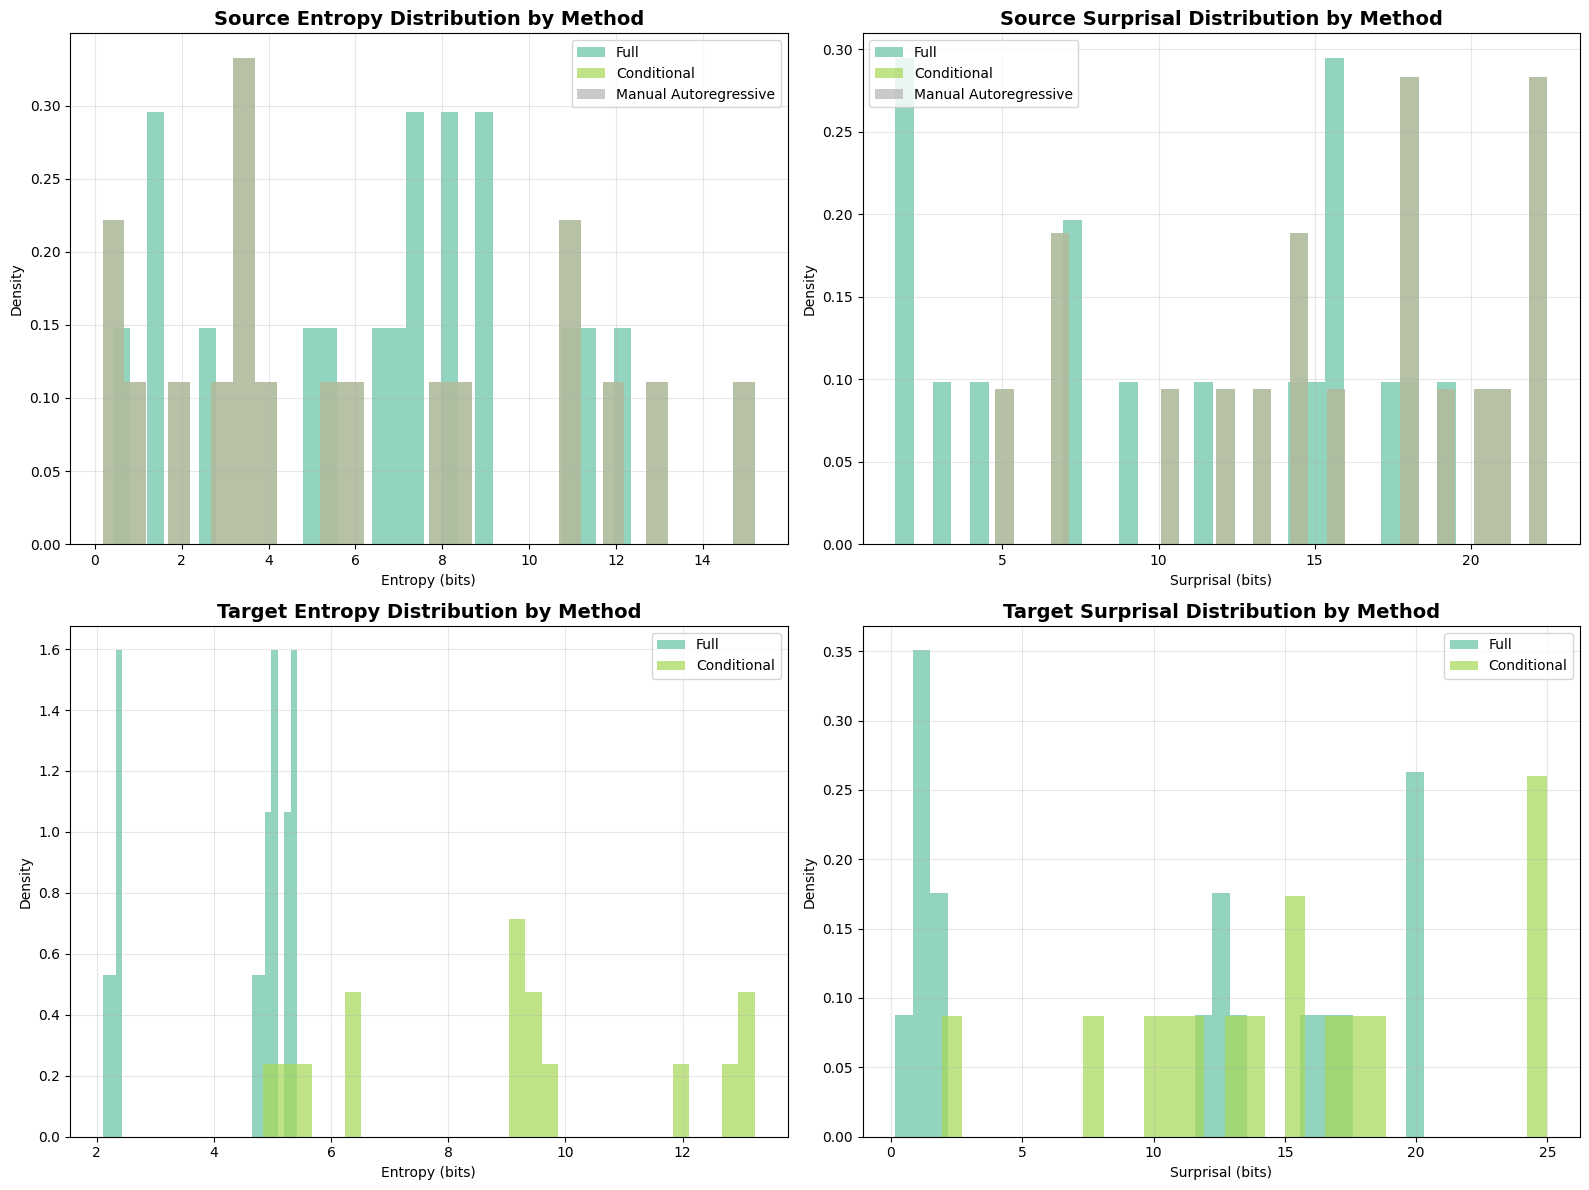

Creating summary statistics plots...


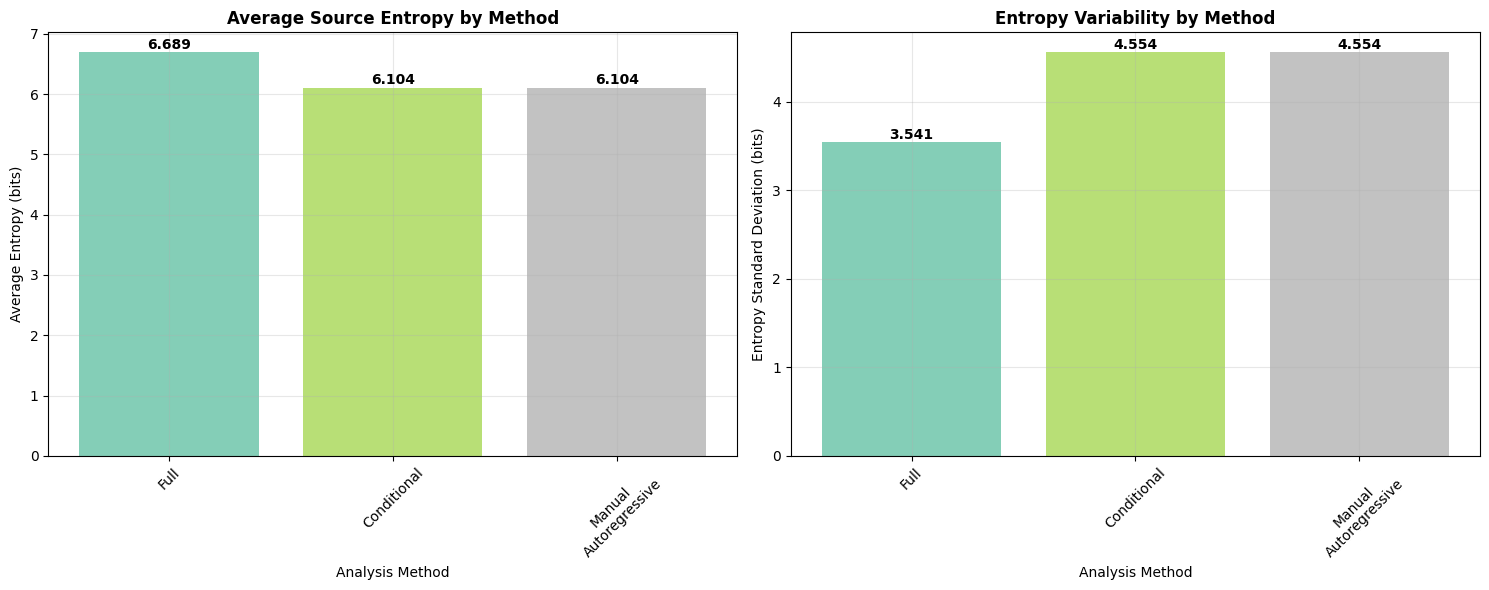

Creating token-level analysis plots...
Plotting token-level analysis for: 'A potem do pokoju weszła kobieta , którą Zuzanna j...'


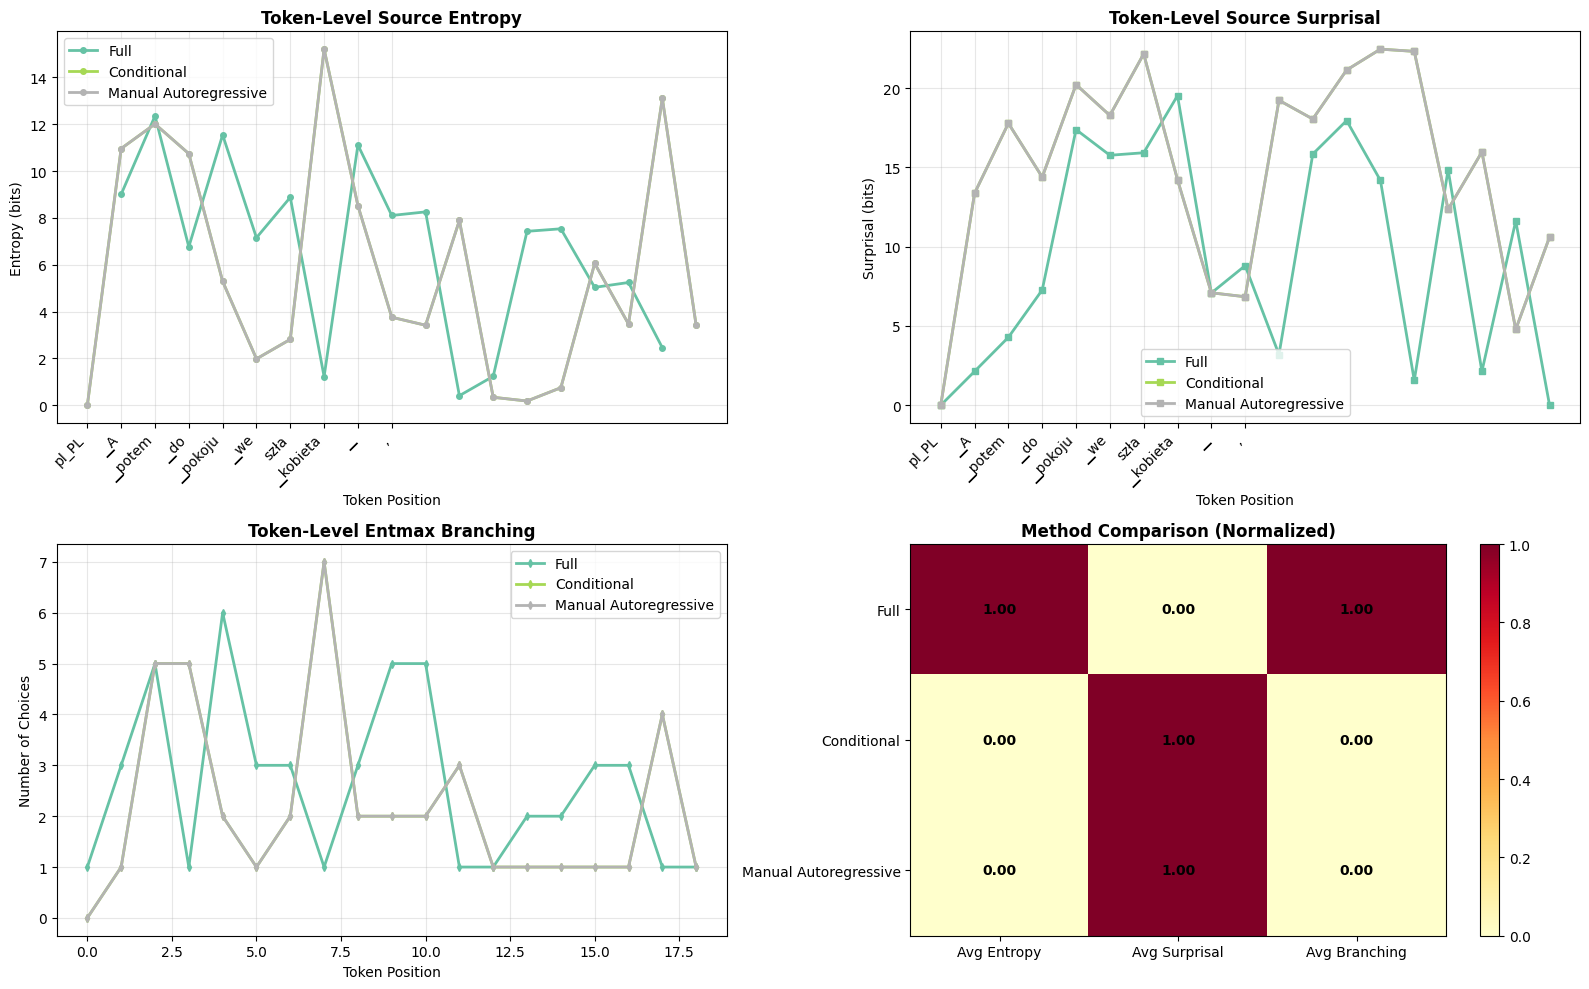

✅ All visualizations saved to /content/corpus_annotation/ovs_corpus

EXPORTING ENHANCED TOKEN-LEVEL ANALYSIS
Processing FULL analysis...
Processing CONDITIONAL analysis...
Processing MANUAL_AUTOREGRESSIVE analysis...
✅ Enhanced token analysis exported to: /content/corpus_annotation/ovs_corpus/ovs_corpus_enhanced_token_analysis.csv
   - Total records: 604
   - Columns: 137
   - Analysis methods: 3
   - Unique sentences: 1
   - Entropy/surprisal metrics: 126
✅ Analysis report generated: /content/corpus_annotation/ovs_corpus/ovs_corpus_analysis_report.md

COMET INTEGRATION SETUP
✅ FULL: 10 candidate translations saved.
✅ CONDITIONAL: 10 candidate translations saved.
✅ MANUAL_AUTOREGRESSIVE: 10 candidate translations saved.

RUNNING COMET SCORING

🔹 Running COMET for FULL...
📤 Command: comet-score -s /content/corpus_annotation/ovs_corpus/ovs_corpus_full_sources.txt -t /content/corpus_annotation/ovs_corpus/ovs_corpus_full_targets.txt --model Unbabel/wmt20-comet-qe-da --to_json /content/corp

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LinAlgError: SVD did not converge in Linear Least Squares

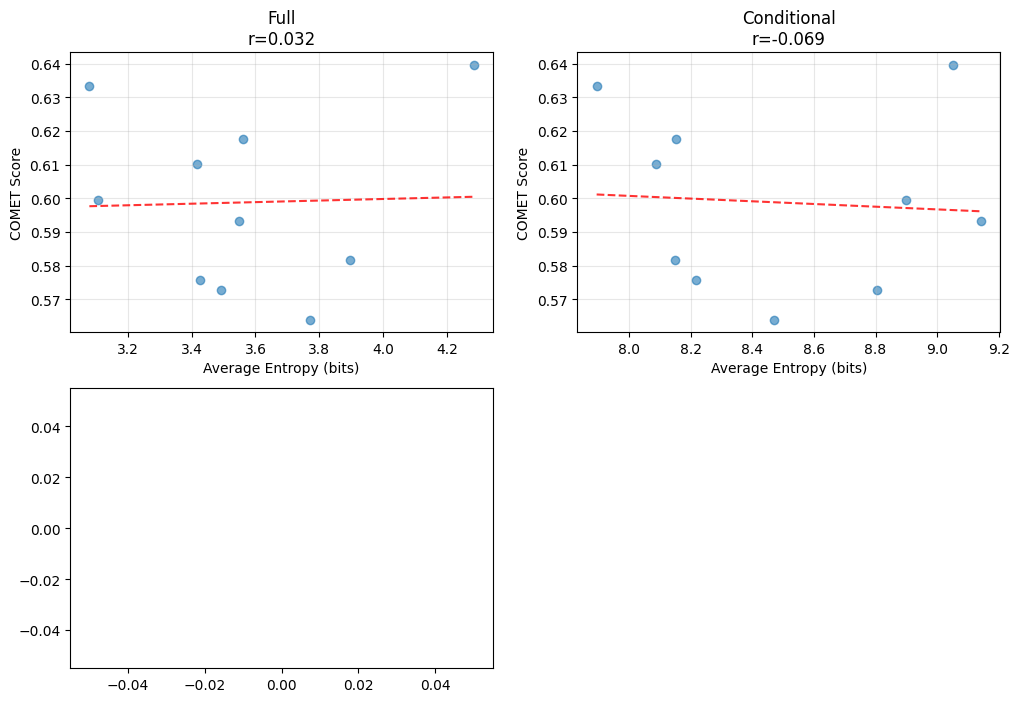

In [1]:
# ====================================================================
# CELL 1: Setup and Installation
# ====================================================================

# Uncomment if running in Colab and need to install dependencies
# !pip install transformers torch entmax spacy comet-ml unbabel-comet
# !python -m spacy download en_core_web_sm
# !python -m spacy download pl_core_news_sm

# ====================================================================
# CELL 2: Imports
# ====================================================================

import sys
import os
import json
import pandas as pd
import numpy as np
from typing import List, Dict, Any
import matplotlib.pyplot as plt
import seaborn as sns

# Import the ENHANCED analysis module
# Make sure the enhanced_translation_entropy_analysis.py is in your path
from enhanced_translation_entropy_analysis import EnhancedTranslationEntropyAnalyzer

# ====================================================================
# CELL 3: Configuration
# ====================================================================
data_source = "ovs_corpus"
data_dir = f"/content/corpus_annotation/{data_source}"

os.makedirs(data_dir, exist_ok=True)

# Configuration parameters
CONFIG = {
    'model_name': "facebook/mbart-large-50-many-to-many-mmt",
    'src_lang': "pl_PL",
    'tgt_lang': "en_XX",
    'num_beams': 10,
    'num_return_sequences': 10,
    'output_dir': data_dir,
    'run_comet': True,  # Set to False if you don't want to run COMET scoring
    'run_individual_analyses': True  # Set to False to only run comprehensive analysis
}

print("Enhanced Analysis Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

# ====================================================================
# CELL 4: Data Input - Load your data
# ====================================================================

# Load your existing data
with open('/content/drive/MyDrive/NMT/data/construal_PL_perturbed.json', 'r') as f:
    svo_ovs_data = json.load(f)

svo_data = []
ovs_data = []
for i, sent in enumerate(svo_ovs_data.items()):
    svo_data.append(sent[1][0])
    ovs_data.append(sent[1][1])

svo_corpus = pd.read_csv('/content/drive/MyDrive/NMT/data/svo_corpus.csv')
ovs_corpus = pd.read_csv('/content/drive/MyDrive/NMT/data/ovs_corpus.csv')

# Choose your sentence set
sentences = [
    "Na podwórzu bawił się piłką chłopiec. Chłopiec dał piłkę kotu.",
    "Na podwórzu bawił się piłką chłopiec. Chłopiec pił wodę z miski.",
    "Na podwórzu bawił się piłką chłopiec. Piłkę dał chłopiec kotu.",
    "Na podwórzu bawił się piłką chłopiec. Piłkę chłopiec dał kotu.",
    "Na podwórzu bawił się chłopiec z kotem. Chłopiec dał kotu piłkę.",
    "Na podwórzu bawił się chłopiec z kotem. Chłopiec kotu dał piłkę.",
    "Na podwórzu bawił się chłopiec z kotem. Kotu chłopiec dał piłkę.",
    "Na podwórzu bawił się chłopiec z kotem. Kotu dał chłopiec piłkę.",
    "Na podwórzu bawił się kot piłką. Kotu piłkę dał chłopiec.",
    "Na podwórzu bawił się kot piłką. Kotu dał chłopiec piłkę.",
    "Na podwórzu bawił się kot piłką. Piłkę dał kotu chłopiec."
]

# Alternative: Use your corpus data
sentences = ovs_corpus['Edited_Sentence'].tolist()[:1]  # Limit for testing
#sentences = ovs_data  # Limit for testing

print(f"Using {len(sentences)} sentences for analysis")

# ====================================================================
# CELL 5: Initialize ENHANCED Analyzer
# ====================================================================

print("Initializing EnhancedTranslationEntropyAnalyzer...")
analyzer = EnhancedTranslationEntropyAnalyzer(
    model_name=CONFIG['model_name'],
    src_lang=CONFIG['src_lang'],
    tgt_lang=CONFIG['tgt_lang']
)
print("Enhanced analyzer initialized successfully!")

# Display available analysis methods
print("\nAvailable Analysis Methods:")
for method, description in analyzer.get_analysis_descriptions().items():
    print(f"\n{method.upper()}:")
    print(description.strip())

# ====================================================================
# CELL 6: Run Comprehensive Four-Way Analysis
# ====================================================================

print("\n" + "="*60)
print("STARTING COMPREHENSIVE FOUR-WAY ANALYSIS")
print("="*60)
print("This will run ALL analysis methods:")
print("1. FULL Analysis (seq2seq model)")
print("2. CONDITIONAL Analysis (conditional model)")
print("3. MANUAL_AUTOREGRESSIVE Analysis (both models)")
print("4. MANUAL_BIGRAM_DECODER Analysis (conditional model)")

# Run all analysis methods
all_results = analyzer.analyze_all_methods(
    sentences,
    num_beams=CONFIG['num_beams'],
    num_return_sequences=CONFIG['num_return_sequences']
)

print(f"\nComprehensive analysis completed!")
for analysis_type, results in all_results.items():
    print(f"- {analysis_type.upper()} analysis: {len(results)} sentences")

# ====================================================================
# CELL 7: Save Results
# ====================================================================

print("\n" + "="*60)
print("SAVING ANALYSIS RESULTS")
print("="*60)

# Save comprehensive results
comprehensive_file = os.path.join(CONFIG['output_dir'], f"{data_source}_comprehensive.json")
analyzer.save_results(all_results, comprehensive_file)
print(f"✅ Comprehensive results saved to: {comprehensive_file}")

# Save individual analysis results
individual_files = {}
for analysis_type, results in all_results.items():
    individual_file = os.path.join(CONFIG['output_dir'], f"{data_source}_{analysis_type}.json")
    analyzer.save_results({analysis_type: results}, individual_file)
    individual_files[analysis_type] = individual_file
    print(f"✅ {analysis_type.upper()} results saved to: {individual_file}")

# Export to CSV files
print("\nExporting to CSV files...")
csv_files = {}
for analysis_type, results in all_results.items():
    df = analyzer.export_to_dataframe({analysis_type: results}, analysis_type)
    csv_file = os.path.join(CONFIG['output_dir'], f"{data_source}_{analysis_type}.csv")
    df.to_csv(csv_file, index=False, encoding='utf-8')
    csv_files[analysis_type] = csv_file
    print(f"✅ {analysis_type.upper()} DataFrame exported: {csv_file} ({df.shape[0]} rows, {df.shape[1]} columns)")

# ====================================================================
# CELL 8: Enhanced Analysis Summary
# ====================================================================

def print_enhanced_analysis_summary(all_results):
    """Print comprehensive analysis summary for all methods."""
    print("\n" + "="*60)
    print("ENHANCED ANALYSIS SUMMARY")
    print("="*60)

    for analysis_type, results in all_results.items():
        print(f"\n{analysis_type.upper()} ANALYSIS:")
        print(f"  Sentences processed: {len(results)}")

        # Count total candidates
        total_candidates = sum(len(data['candidates']) for data in results.values())
        print(f"  Translation candidates: {total_candidates}")
        print(f"  Average candidates per sentence: {total_candidates/len(results):.1f}")

        # Analyze source metrics
        if results:
            sample_source = list(results.values())[0]['source_info']
            source_metrics = [k for k in sample_source.keys()
                            if isinstance(sample_source[k], dict) and 'entropy' in k]
            print(f"  Source entropy metrics: {len(source_metrics)}")

            # Calculate average source entropy
            all_source_entropies = []
            entropy_key = None
            for key in source_metrics:
                if 'entmax' not in key and 'topk' not in key and 'bigram' not in key:
                    entropy_key = key
                    break

            if entropy_key:
                for data in results.values():
                    if entropy_key in data['source_info']:
                        entropies = list(data['source_info'][entropy_key].values())
                        all_source_entropies.extend([e for e in entropies if e > 0])

                if all_source_entropies:
                    print(f"  Average source entropy: {np.mean(all_source_entropies):.4f} ± {np.std(all_source_entropies):.4f} bits")

print_enhanced_analysis_summary(all_results)

# ====================================================================
# CELL 9: Cross-Method Comparison
# ====================================================================

def compare_analysis_methods(all_results):
    """Compare metrics across all analysis methods."""
    print("\n" + "="*60)
    print("CROSS-METHOD COMPARISON")
    print("="*60)

    comparison_data = {}
    sample_sentence = list(all_results[list(all_results.keys())[0]].keys())[0]

    print(f"Comparing methods for sample sentence: '{sample_sentence[:50]}...'")

    for analysis_type, results in all_results.items():
        if sample_sentence in results:
            source_info = results[sample_sentence]['source_info']

            # Find primary entropy metric
            entropy_keys = [k for k in source_info.keys()
                          if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]

            if entropy_keys and isinstance(source_info[entropy_keys[0]], dict):
                sample_entropies = list(source_info[entropy_keys[0]].values())
                sample_entropies = [e for e in sample_entropies if e > 0]  # Remove zeros

                if sample_entropies:
                    comparison_data[analysis_type] = {
                        'avg_entropy': np.mean(sample_entropies),
                        'std_entropy': np.std(sample_entropies),
                        'num_tokens': len(sample_entropies),
                        'entropy_key': entropy_keys[0]
                    }

    # Display comparison
    print("\nEntropy Comparison:")
    print(f"{'Method':<25} {'Avg Entropy':<12} {'Std Dev':<12} {'Tokens':<8} {'Metric Key'}")
    print("-" * 80)

    for method, data in comparison_data.items():
        print(f"{method:<25} {data['avg_entropy']:<12.4f} {data['std_entropy']:<12.4f} "
              f"{data['num_tokens']:<8} {data['entropy_key']}")

    return comparison_data

comparison_results = compare_analysis_methods(all_results)

# Save comparison results
comparison_file = os.path.join(CONFIG['output_dir'], f"{data_source}_method_comparison.json")
with open(comparison_file, 'w', encoding='utf-8') as f:
    json.dump(comparison_results, f, ensure_ascii=False, indent=2)
print(f"\n✅ Method comparison saved to: {comparison_file}")

# ====================================================================
# CELL 10: Advanced Entropy Analysis Functions
# ====================================================================

def analyze_entropy_distributions(all_results):
    """Analyze entropy distributions across all methods."""
    print("\n" + "="*60)
    print("ENTROPY DISTRIBUTION ANALYSIS")
    print("="*60)

    method_entropy_data = {}

    for analysis_type, results in all_results.items():
        print(f"\n{analysis_type.upper()}:")

        all_source_entropies = []
        all_target_entropies = []
        all_source_surprisals = []
        all_target_surprisals = []

        # Extract entropy metrics
        for sentence, data in results.items():
            source_info = data['source_info']

            # Find primary entropy and surprisal keys
            entropy_keys = [k for k in source_info.keys()
                          if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]
            surprisal_keys = [k for k in source_info.keys()
                            if 'surprisal_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]

            # Source metrics
            if entropy_keys and isinstance(source_info[entropy_keys[0]], dict):
                entropies = [v for v in source_info[entropy_keys[0]].values() if v > 0]
                all_source_entropies.extend(entropies)

            if surprisal_keys and isinstance(source_info[surprisal_keys[0]], dict):
                surprisals = [v for v in source_info[surprisal_keys[0]].values() if v > 0]
                all_source_surprisals.extend(surprisals)

            # Target metrics (first candidate)
            if data['candidates']:
                first_candidate = data['candidates'][0]
                target_entropy_keys = [k for k in first_candidate.keys()
                                     if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]
                target_surprisal_keys = [k for k in first_candidate.keys()
                                       if 'surprisal_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]

                if target_entropy_keys and isinstance(first_candidate[target_entropy_keys[0]], dict):
                    entropies = [v for v in first_candidate[target_entropy_keys[0]].values() if v > 0]
                    all_target_entropies.extend(entropies)

                if target_surprisal_keys and isinstance(first_candidate[target_surprisal_keys[0]], dict):
                    surprisals = [v for v in first_candidate[target_surprisal_keys[0]].values() if v > 0]
                    all_target_surprisals.extend(surprisals)

        # Calculate and display statistics
        if all_source_entropies:
            print(f"  Source Entropy: μ={np.mean(all_source_entropies):.4f}, σ={np.std(all_source_entropies):.4f}, "
                  f"range=[{np.min(all_source_entropies):.3f}, {np.max(all_source_entropies):.3f}]")

        if all_source_surprisals:
            print(f"  Source Surprisal: μ={np.mean(all_source_surprisals):.4f}, σ={np.std(all_source_surprisals):.4f}, "
                  f"range=[{np.min(all_source_surprisals):.3f}, {np.max(all_source_surprisals):.3f}]")

        if all_target_entropies:
            print(f"  Target Entropy: μ={np.mean(all_target_entropies):.4f}, σ={np.std(all_target_entropies):.4f}, "
                  f"range=[{np.min(all_target_entropies):.3f}, {np.max(all_target_entropies):.3f}]")

        if all_target_surprisals:
            print(f"  Target Surprisal: μ={np.mean(all_target_surprisals):.4f}, σ={np.std(all_target_surprisals):.4f}, "
                  f"range=[{np.min(all_target_surprisals):.3f}, {np.max(all_target_surprisals):.3f}]")

        method_entropy_data[analysis_type] = {
            'source_entropy': all_source_entropies,
            'source_surprisal': all_source_surprisals,
            'target_entropy': all_target_entropies,
            'target_surprisal': all_target_surprisals
        }

    return method_entropy_data

def analyze_entmax_branching_patterns(all_results):
    """Analyze entmax branching patterns across methods."""
    print("\n" + "="*60)
    print("ENTMAX BRANCHING ANALYSIS")
    print("="*60)

    for analysis_type, results in all_results.items():
        all_branching = []

        for sentence, data in results.items():
            source_info = data['source_info']

            # Find branching keys
            branching_keys = [k for k in source_info.keys() if 'branching_choices' in k]

            for key in branching_keys:
                if isinstance(source_info[key], dict):
                    branching_values = [v for v in source_info[key].values() if v > 0]
                    all_branching.extend(branching_values)

        if all_branching:
            print(f"{analysis_type.upper()}:")
            print(f"  Average branching: {np.mean(all_branching):.2f} ± {np.std(all_branching):.2f}")
            print(f"  Range: {min(all_branching)} - {max(all_branching)}")
            print(f"  Total branching points: {len(all_branching)}")

def analyze_model_specific_metrics(all_results):
    """Analyze metrics specific to different models in manual analysis."""
    print("\n" + "="*60)
    print("MODEL-SPECIFIC METRICS ANALYSIS")
    print("="*60)

    if 'manual_autoregressive' in all_results:
        manual_results = all_results['manual_autoregressive']

        print("MANUAL_AUTOREGRESSIVE Analysis includes metrics from both models:")

        # Sample a sentence to examine available metrics
        sample_sentence = list(manual_results.keys())[0]
        sample_source = manual_results[sample_sentence]['source_info']

        seq2seq_metrics = [k for k in sample_source.keys() if 'seq2seq' in k]
        conditional_metrics = [k for k in sample_source.keys() if 'conditional' in k]
        bigram_decoder_metrics = [k for k in sample_source.keys() if 'bigram_decoder' in k]

        print(f"  Seq2seq model metrics: {len(seq2seq_metrics)}")
        for metric in seq2seq_metrics[:3]:  # Show first 3
            print(f"    - {metric}")

        print(f"  Conditional model metrics: {len(conditional_metrics)}")
        for metric in conditional_metrics[:3]:  # Show first 3
            print(f"    - {metric}")

        print(f"  Bigram decoder metrics: {len(bigram_decoder_metrics)}")
        for metric in bigram_decoder_metrics[:3]:  # Show first 3
            print(f"    - {metric}")

        # Compare seq2seq vs conditional entropy for same tokens
        seq2seq_entropy_key = next((k for k in seq2seq_metrics if 'entropy_bits' in k), None)
        conditional_entropy_key = next((k for k in conditional_metrics if 'entropy_bits' in k), None)

        if seq2seq_entropy_key and conditional_entropy_key:
            seq2seq_entropies = []
            conditional_entropies = []

            for sentence, data in manual_results.items():
                source_info = data['source_info']

                if seq2seq_entropy_key in source_info and conditional_entropy_key in source_info:
                    seq2seq_vals = [v for v in source_info[seq2seq_entropy_key].values() if v > 0]
                    conditional_vals = [v for v in source_info[conditional_entropy_key].values() if v > 0]

                    seq2seq_entropies.extend(seq2seq_vals)
                    conditional_entropies.extend(conditional_vals)

            if seq2seq_entropies and conditional_entropies:
                print(f"\nModel Comparison:")
                print(f"  Seq2seq entropy: μ={np.mean(seq2seq_entropies):.4f}, σ={np.std(seq2seq_entropies):.4f}")
                print(f"  Conditional entropy: μ={np.mean(conditional_entropies):.4f}, σ={np.std(conditional_entropies):.4f}")

                # Calculate correlation if same length
                min_len = min(len(seq2seq_entropies), len(conditional_entropies))
                if min_len > 10:
                    correlation = np.corrcoef(seq2seq_entropies[:min_len], conditional_entropies[:min_len])[0, 1]
                    print(f"  Correlation: {correlation:.4f}")

# ====================================================================
# CELL 11: Run Advanced Analysis
# ====================================================================

print("Running advanced entropy analysis...")

# Run entropy distribution analysis
entropy_data = analyze_entropy_distributions(all_results)

# Run entmax branching analysis
analyze_entmax_branching_patterns(all_results)

# Run model-specific analysis
analyze_model_specific_metrics(all_results)

# ====================================================================
# CELL 12: Enhanced Visualization Functions
# ====================================================================

def plot_method_entropy_comparison(entropy_data):
    """Plot entropy comparison across all methods with enhanced visualization."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    methods = list(entropy_data.keys())
    colors = plt.cm.Set2(np.linspace(0, 1, len(methods)))

    # Source entropy
    axes[0, 0].set_title('Source Entropy Distribution by Method', fontsize=14, fontweight='bold')
    for i, (method, data) in enumerate(entropy_data.items()):
        if data['source_entropy']:
            axes[0, 0].hist(data['source_entropy'], alpha=0.7, label=method.replace('_', ' ').title(),
                          color=colors[i], bins=30, density=True)
    axes[0, 0].set_xlabel('Entropy (bits)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Source surprisal
    axes[0, 1].set_title('Source Surprisal Distribution by Method', fontsize=14, fontweight='bold')
    for i, (method, data) in enumerate(entropy_data.items()):
        if data['source_surprisal']:
            axes[0, 1].hist(data['source_surprisal'], alpha=0.7, label=method.replace('_', ' ').title(),
                          color=colors[i], bins=30, density=True)
    axes[0, 1].set_xlabel('Surprisal (bits)')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Target entropy
    axes[1, 0].set_title('Target Entropy Distribution by Method', fontsize=14, fontweight='bold')
    for i, (method, data) in enumerate(entropy_data.items()):
        if data['target_entropy']:
            axes[1, 0].hist(data['target_entropy'], alpha=0.7, label=method.replace('_', ' ').title(),
                          color=colors[i], bins=30, density=True)
    axes[1, 0].set_xlabel('Entropy (bits)')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Target surprisal
    axes[1, 1].set_title('Target Surprisal Distribution by Method', fontsize=14, fontweight='bold')
    for i, (method, data) in enumerate(entropy_data.items()):
        if data['target_surprisal']:
            axes[1, 1].hist(data['target_surprisal'], alpha=0.7, label=method.replace('_', ' ').title(),
                          color=colors[i], bins=30, density=True)
    axes[1, 1].set_xlabel('Surprisal (bits)')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(CONFIG['output_dir'], f'{data_source}_method_entropy_comparison.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

def plot_method_summary_stats(comparison_results):
    """Plot summary statistics for each analysis method."""
    if not comparison_results:
        print("No comparison results available for plotting")
        return

    methods = list(comparison_results.keys())
    avg_entropies = [comparison_results[method]['avg_entropy'] for method in methods]
    std_entropies = [comparison_results[method]['std_entropy'] for method in methods]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Average entropy bar plot
    bars1 = ax1.bar(range(len(methods)), avg_entropies,
                    color=plt.cm.Set2(np.linspace(0, 1, len(methods))), alpha=0.8)
    ax1.set_xlabel('Analysis Method')
    ax1.set_ylabel('Average Entropy (bits)')
    ax1.set_title('Average Source Entropy by Method', fontweight='bold')
    ax1.set_xticks(range(len(methods)))
    ax1.set_xticklabels([m.replace('_', '\n').title() for m in methods], rotation=45)
    ax1.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, val in zip(bars1, avg_entropies):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

    # Standard deviation bar plot
    bars2 = ax2.bar(range(len(methods)), std_entropies,
                    color=plt.cm.Set2(np.linspace(0, 1, len(methods))), alpha=0.8)
    ax2.set_xlabel('Analysis Method')
    ax2.set_ylabel('Entropy Standard Deviation (bits)')
    ax2.set_title('Entropy Variability by Method', fontweight='bold')
    ax2.set_xticks(range(len(methods)))
    ax2.set_xticklabels([m.replace('_', '\n').title() for m in methods], rotation=45)
    ax2.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, val in zip(bars2, std_entropies):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig(os.path.join(CONFIG['output_dir'], f'{data_source}_method_summary_stats.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

def plot_token_level_analysis(all_results, sample_sentence_idx=0):
    """Plot token-level entropy analysis for a sample sentence."""
    sample_sentence = sentences[sample_sentence_idx]

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    methods = list(all_results.keys())
    colors = plt.cm.Set2(np.linspace(0, 1, len(methods)))

    print(f"Plotting token-level analysis for: '{sample_sentence[:50]}...'")

    for i, (method, results) in enumerate(all_results.items()):
        if sample_sentence in results:
            source_info = results[sample_sentence]['source_info']
            tokens = source_info['tokens']

            # Find primary entropy and surprisal keys
            entropy_keys = [k for k in source_info.keys()
                          if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]
            surprisal_keys = [k for k in source_info.keys()
                            if 'surprisal_bits' in k and 'entmax' not in k and 'topk' not in k and 'bigram' not in k]

            if entropy_keys and isinstance(source_info[entropy_keys[0]], dict):
                entropies = [source_info[entropy_keys[0]].get(token, 0) for token in tokens]
                positions = range(len(tokens))

                axes[0, 0].plot(positions, entropies, marker='o', label=method.replace('_', ' ').title(),
                              color=colors[i], linewidth=2, markersize=4)

            if surprisal_keys and isinstance(source_info[surprisal_keys[0]], dict):
                surprisals = [source_info[surprisal_keys[0]].get(token, 0) for token in tokens]
                positions = range(len(tokens))

                axes[0, 1].plot(positions, surprisals, marker='s', label=method.replace('_', ' ').title(),
                              color=colors[i], linewidth=2, markersize=4)

    axes[0, 0].set_title('Token-Level Source Entropy', fontweight='bold')
    axes[0, 0].set_xlabel('Token Position')
    axes[0, 0].set_ylabel('Entropy (bits)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].set_title('Token-Level Source Surprisal', fontweight='bold')
    axes[0, 1].set_xlabel('Token Position')
    axes[0, 1].set_ylabel('Surprisal (bits)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Add token labels on x-axis for first subplot
    if sample_sentence in list(all_results.values())[0]:
        sample_tokens = list(all_results.values())[0][sample_sentence]['source_info']['tokens'][:10]  # First 10 tokens
        axes[0, 0].set_xticks(range(min(10, len(sample_tokens))))
        axes[0, 0].set_xticklabels([t[:8] for t in sample_tokens], rotation=45, ha='right')

        axes[0, 1].set_xticks(range(min(10, len(sample_tokens))))
        axes[0, 1].set_xticklabels([t[:8] for t in sample_tokens], rotation=45, ha='right')

    # Entmax branching analysis
    for i, (method, results) in enumerate(all_results.items()):
        if sample_sentence in results:
            source_info = results[sample_sentence]['source_info']
            tokens = source_info['tokens']

            branching_keys = [k for k in source_info.keys() if 'branching_choices' in k]
            if branching_keys and isinstance(source_info[branching_keys[0]], dict):
                branching = [source_info[branching_keys[0]].get(token, 0) for token in tokens]
                positions = range(len(tokens))

                axes[1, 0].plot(positions, branching, marker='d', label=method.replace('_', ' ').title(),
                              color=colors[i], linewidth=2, markersize=4)

    axes[1, 0].set_title('Token-Level Entmax Branching', fontweight='bold')
    axes[1, 0].set_xlabel('Token Position')
    axes[1, 0].set_ylabel('Number of Choices')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Method comparison heatmap
    comparison_matrix = []
    method_names = []
    metric_names = []

    for method, results in all_results.items():
        if sample_sentence in results:
            source_info = results[sample_sentence]['source_info']
            method_names.append(method.replace('_', ' ').title())

            # Extract average metrics
            entropy_keys = [k for k in source_info.keys()
                          if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k]
            surprisal_keys = [k for k in source_info.keys()
                            if 'surprisal_bits' in k and 'entmax' not in k and 'topk' not in k]
            branching_keys = [k for k in source_info.keys() if 'branching_choices' in k]

            row_data = []
            if not metric_names:  # Set metric names only once
                if entropy_keys:
                    metric_names.append('Avg Entropy')
                if surprisal_keys:
                    metric_names.append('Avg Surprisal')
                if branching_keys:
                    metric_names.append('Avg Branching')

            # Calculate averages
            if entropy_keys and isinstance(source_info[entropy_keys[0]], dict):
                entropies = [v for v in source_info[entropy_keys[0]].values() if v > 0]
                row_data.append(np.mean(entropies) if entropies else 0)

            if surprisal_keys and isinstance(source_info[surprisal_keys[0]], dict):
                surprisals = [v for v in source_info[surprisal_keys[0]].values() if v > 0]
                row_data.append(np.mean(surprisals) if surprisals else 0)

            if branching_keys and isinstance(source_info[branching_keys[0]], dict):
                branching = [v for v in source_info[branching_keys[0]].values() if v > 0]
                row_data.append(np.mean(branching) if branching else 0)

            comparison_matrix.append(row_data)

    if comparison_matrix and metric_names:
        comparison_matrix = np.array(comparison_matrix)

        # Normalize each column for better visualization
        for j in range(comparison_matrix.shape[1]):
            col = comparison_matrix[:, j]
            if col.max() > col.min():
                comparison_matrix[:, j] = (col - col.min()) / (col.max() - col.min())

        im = axes[1, 1].imshow(comparison_matrix, cmap='YlOrRd', aspect='auto')
        axes[1, 1].set_title('Method Comparison (Normalized)', fontweight='bold')
        axes[1, 1].set_xticks(range(len(metric_names)))
        axes[1, 1].set_xticklabels(metric_names)
        axes[1, 1].set_yticks(range(len(method_names)))
        axes[1, 1].set_yticklabels(method_names)

        # Add text annotations
        for i in range(len(method_names)):
            for j in range(len(metric_names)):
                text = axes[1, 1].text(j, i, f'{comparison_matrix[i, j]:.2f}',
                                     ha="center", va="center", color="black", fontweight='bold')

        plt.colorbar(im, ax=axes[1, 1])

    plt.tight_layout()
    plt.savefig(os.path.join(CONFIG['output_dir'], f'{data_source}_token_level_analysis.png'),
                dpi=300, bbox_inches='tight')
    plt.show()

# ====================================================================
# CELL 13: Generate Enhanced Visualizations
# ====================================================================

print("\n" + "="*60)
print("GENERATING ENHANCED VISUALIZATIONS")
print("="*60)

# Plot method entropy comparison
print("Creating entropy distribution plots...")
plot_method_entropy_comparison(entropy_data)

# Plot method summary statistics
print("Creating summary statistics plots...")
plot_method_summary_stats(comparison_results)

# Plot token-level analysis
print("Creating token-level analysis plots...")
plot_token_level_analysis(all_results, sample_sentence_idx=0)

print(f"✅ All visualizations saved to {CONFIG['output_dir']}")

# ====================================================================
# CELL 14: Export Enhanced Token-Level Analysis
# ====================================================================

def export_enhanced_token_analysis(all_results):
    """Export comprehensive token-level analysis with all metrics."""
    print("\n" + "="*60)
    print("EXPORTING ENHANCED TOKEN-LEVEL ANALYSIS")
    print("="*60)

    all_token_data = []

    for analysis_type, results in all_results.items():
        print(f"Processing {analysis_type.upper()} analysis...")

        for sentence, data in results.items():
            source_info = data['source_info']
            tokens = source_info['tokens']

            for i, token in enumerate(tokens):
                token_record = {
                    'analysis_method': analysis_type,
                    'sentence': sentence,
                    'sentence_length': len(tokens),
                    'token_position': i,
                    'token': token,
                    'pos_tag': source_info.get('pos', ['UNK'] * len(tokens))[i],
                    'dep_tag': source_info.get('dep', ['UNK'] * len(tokens))[i],
                    'spacy_token': source_info.get('spacy_tokens', ['UNK'] * len(tokens))[i]
                }

                # Add all numeric metrics for this token
                for metric_name, metric_data in source_info.items():
                    if isinstance(metric_data, dict) and token in metric_data:
                        token_record[metric_name] = metric_data[token]
                    elif isinstance(metric_data, dict):
                        token_record[metric_name] = 0  # Default value for missing tokens

                all_token_data.append(token_record)

            # Process target candidates
            for candidate_idx, candidate in enumerate(data['candidates']):
                target_tokens = candidate['tokens']

                for i, token in enumerate(target_tokens):
                    token_record = {
                        'analysis_method': analysis_type,
                        'sentence': sentence,
                        'sentence_length': len(target_tokens),
                        'token_position': i,
                        'token': token,
                        'token_type': 'target',
                        'candidate_idx': candidate_idx,
                        'target_sentence': candidate['sentence'],
                        'pos_tag': candidate.get('pos', ['UNK'] * len(target_tokens))[i],
                        'dep_tag': candidate.get('dep', ['UNK'] * len(target_tokens))[i],
                        'spacy_token': candidate.get('spacy_tokens', ['UNK'] * len(target_tokens))[i]
                    }

                    # Add all target metrics
                    for metric_name, metric_data in candidate.items():
                        if isinstance(metric_data, dict) and token in metric_data:
                            token_record[metric_name] = metric_data[token]
                        elif isinstance(metric_data, dict):
                            token_record[metric_name] = 0

                    all_token_data.append(token_record)

    # Create comprehensive DataFrame
    df = pd.DataFrame(all_token_data)

    # Fill missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(0)

    # Export to CSV
    enhanced_csv_file = os.path.join(CONFIG['output_dir'], f'{data_source}_enhanced_token_analysis.csv')
    df.to_csv(enhanced_csv_file, index=False, encoding='utf-8')

    print(f"✅ Enhanced token analysis exported to: {enhanced_csv_file}")
    print(f"   - Total records: {len(df):,}")
    print(f"   - Columns: {len(df.columns)}")
    print(f"   - Analysis methods: {df['analysis_method'].nunique()}")
    print(f"   - Unique sentences: {df['sentence'].nunique()}")

    # Show sample of metrics available
    metric_columns = [col for col in df.columns if any(x in col for x in ['entropy', 'surprisal', 'branching', 'topk', 'entmax'])]
    print(f"   - Entropy/surprisal metrics: {len(metric_columns)}")

    return df, enhanced_csv_file

# Export enhanced token analysis
enhanced_df, enhanced_csv_file = export_enhanced_token_analysis(all_results)

# ====================================================================
# CELL 15: Generate Analysis Report
# ====================================================================

def generate_analysis_report(all_results, comparison_results, entropy_data):
    """Generate comprehensive analysis report."""

    report_file = os.path.join(CONFIG['output_dir'], f'{data_source}_analysis_report.md')

    with open(report_file, 'w', encoding='utf-8') as f:
        f.write(f"# Enhanced Translation Entropy Analysis Report\n\n")
        f.write(f"**Analysis Date:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        f.write(f"**Dataset:** {data_source}\n\n")

        # Configuration
        f.write("## Configuration\n\n")
        for key, value in CONFIG.items():
            f.write(f"- **{key}:** {value}\n")
        f.write("\n")

        # Dataset Information
        f.write("## Dataset Information\n\n")
        f.write(f"- **Number of sentences:** {len(sentences)}\n")
        f.write(f"- **Source language:** {CONFIG['src_lang']}\n")
        f.write(f"- **Target language:** {CONFIG['tgt_lang']}\n")
        f.write(f"- **Translation candidates per sentence:** {CONFIG['num_return_sequences']}\n\n")

        # Analysis Methods
        f.write("## Analysis Methods\n\n")
        for method, description in analyzer.get_analysis_descriptions().items():
            f.write(f"### {method.upper()}\n")
            f.write(f"{description.strip()}\n\n")

        # Results Summary
        f.write("## Results Summary\n\n")
        for analysis_type, results in all_results.items():
            f.write(f"### {analysis_type.upper()} Analysis\n")
            f.write(f"- Sentences processed: {len(results)}\n")

            total_candidates = sum(len(data['candidates']) for data in results.values())
            f.write(f"- Translation candidates: {total_candidates}\n")
            f.write(f"- Average candidates per sentence: {total_candidates/len(results):.1f}\n")

            if results:
                sample_source = list(results.values())[0]['source_info']
                metrics_count = len([k for k in sample_source.keys() if isinstance(sample_source[k], dict)])
                f.write(f"- Entropy metrics per token: {metrics_count}\n")
            f.write("\n")

        # Entropy Statistics
        f.write("## Entropy Statistics\n\n")
        f.write("| Method | Source Entropy (μ±σ) | Target Entropy (μ±σ) | Source Surprisal (μ±σ) | Target Surprisal (μ±σ) |\n")
        f.write("|--------|---------------------|---------------------|----------------------|----------------------|\n")

        for method, data in entropy_data.items():
            source_ent = f"{np.mean(data['source_entropy']):.3f}±{np.std(data['source_entropy']):.3f}" if data['source_entropy'] else "N/A"
            target_ent = f"{np.mean(data['target_entropy']):.3f}±{np.std(data['target_entropy']):.3f}" if data['target_entropy'] else "N/A"
            source_sur = f"{np.mean(data['source_surprisal']):.3f}±{np.std(data['source_surprisal']):.3f}" if data['source_surprisal'] else "N/A"
            target_sur = f"{np.mean(data['target_surprisal']):.3f}±{np.std(data['target_surprisal']):.3f}" if data['target_surprisal'] else "N/A"

            f.write(f"| {method.replace('_', ' ').title()} | {source_ent} | {target_ent} | {source_sur} | {target_sur} |\n")
        f.write("\n")

        # Method Comparison
        f.write("## Method Comparison\n\n")
        f.write("Comparison based on sample sentence entropy metrics:\n\n")
        f.write("| Method | Average Entropy | Std Deviation | Entropy Metric |\n")
        f.write("|--------|----------------|---------------|----------------|\n")

        for method, data in comparison_results.items():
            f.write(f"| {method.replace('_', ' ').title()} | {data['avg_entropy']:.4f} | {data['std_entropy']:.4f} | {data['entropy_key']} |\n")
        f.write("\n")

        # Files Generated
        f.write("## Files Generated\n\n")
        f.write("### Core Results\n")
        for analysis_type in all_results.keys():
            f.write(f"- `{data_source}_{analysis_type}.json` - Complete analysis results\n")
            f.write(f"- `{data_source}_{analysis_type}.csv` - Token-level metrics\n")

        f.write("\n### Analysis Files\n")
        f.write(f"- `{data_source}_comprehensive.json` - All methods combined\n")
        f.write(f"- `{data_source}_method_comparison.json` - Cross-method comparison\n")
        f.write(f"- `{data_source}_enhanced_token_analysis.csv` - Comprehensive token data\n")

        f.write("\n### Visualizations\n")
        f.write(f"- `{data_source}_method_entropy_comparison.png` - Entropy distributions\n")
        f.write(f"- `{data_source}_method_summary_stats.png` - Summary statistics\n")
        f.write(f"- `{data_source}_token_level_analysis.png` - Token-level analysis\n")

        # Methodology
        f.write("\n## Methodology\n\n")
        f.write("This analysis implements four different approaches to measuring translation entropy:\n\n")
        f.write("1. **FULL Analysis**: Uses seq2seq model for autoregressive generation and conditional model for bigram analysis\n")
        f.write("2. **CONDITIONAL Analysis**: Uses conditional model exclusively for all calculations\n")
        f.write("3. **MANUAL_AUTOREGRESSIVE Analysis**: Uses both models with manual masking and autoregressive context\n")
        f.write("4. **MANUAL_BIGRAM_DECODER Analysis**: Uses conditional model for bigram context with decoder masking\n\n")

        f.write("Each method calculates:\n")
        f.write("- Standard entropy and surprisal\n")
        f.write("- Top-k entropy and mass (k=5)\n")
        f.write("- Entmax15 variants\n")
        f.write("- Branching factor metrics\n")
        f.write("- Complete linguistic annotation (POS/DEP tags)\n")

    print(f"✅ Analysis report generated: {report_file}")
    return report_file

# Generate comprehensive report
report_file = generate_analysis_report(all_results, comparison_results, entropy_data)


# ====================================================================
# CELL 16: COMET Integration (Enhanced + JSON Structure Fixed)
# ====================================================================

if CONFIG['run_comet']:
    print("\n" + "="*60)
    print("COMET INTEGRATION SETUP")
    print("="*60)

    def extract_translations_for_comet_enhanced(all_results):
        """Extract candidate translations and prepare files for COMET CLI scoring."""
        comet_files = {}

        for analysis_type, results in all_results.items():
            sources, targets = [], []

            for sentence, data in results.items():
                for candidate in data['candidates']:
                    sources.append(sentence)
                    targets.append(candidate['sentence'])

            src_file = os.path.join(CONFIG['output_dir'], f"{data_source}_{analysis_type}_sources.txt")
            tgt_file = os.path.join(CONFIG['output_dir'], f"{data_source}_{analysis_type}_targets.txt")
            out_file = os.path.join(CONFIG['output_dir'], f"{data_source}_{analysis_type}_comet.json")

            with open(src_file, 'w', encoding='utf-8') as f:
                f.write('\n'.join(sources))
            with open(tgt_file, 'w', encoding='utf-8') as f:
                f.write('\n'.join(targets))

            comet_files[analysis_type] = {
                'src': src_file,
                'tgt': tgt_file,
                'output': out_file
            }

            print(f"✅ {analysis_type.upper()}: {len(sources)} candidate translations saved.")

        return comet_files

    # Prepare COMET inputs
    comet_files = extract_translations_for_comet_enhanced(all_results)

    print("\n" + "="*60)
    print("RUNNING COMET SCORING")
    print("="*60)

    for analysis_type, files in comet_files.items():
        print(f"\n🔹 Running COMET for {analysis_type.upper()}...")
        comet_cmd = f"comet-score -s {files['src']} -t {files['tgt']} --model Unbabel/wmt20-comet-qe-da --to_json {files['output']}"
        print(f"📤 Command: {comet_cmd}")

        try:
            !{comet_cmd}
            print(f"✅ COMET scoring completed for {analysis_type}")
        except Exception as e:
            print(f"❌ Error running COMET for {analysis_type}: {e}")
            continue

    print("\n" + "="*60)
    print("INTEGRATING COMET SCORES")
    print("="*60)

    for analysis_type, files in comet_files.items():
        output_path = files["output"]
        scores = []

        try:
            with open(output_path, 'r', encoding='utf-8') as f:
                comet_json = json.load(f)

            # Handle structure like {path: [ {src, mt, COMET}, ... ]}
            if isinstance(comet_json, dict):
                first_key = list(comet_json.keys())[0]
                comet_entries = comet_json[first_key]
                scores = [float(entry['COMET']) for entry in comet_entries if 'COMET' in entry]
            else:
                print(f"⚠️ Unexpected format in {output_path}, skipping...")
                continue

        except Exception as e:
            print(f"❌ Failed to read or parse COMET output {output_path}: {e}")
            continue

        expected = sum(len(data['candidates']) for data in all_results[analysis_type].values())
        print(f"📊 Extracted {len(scores)} COMET scores, expected {expected}")

        if len(scores) != expected:
            print(f"⚠️ Score count mismatch in {analysis_type.upper()}: {len(scores)} vs {expected}")

        # Integrate scores into candidates
        idx = 0
        for sentence in all_results[analysis_type]:
            for candidate in all_results[analysis_type][sentence]['candidates']:
                candidate['comet_score'] = scores[idx] if idx < len(scores) else None
                idx += 1

        print(f"✅ Integrated {idx} COMET scores into {analysis_type.upper()} candidates")

    # Save updated results
    final_path = os.path.join(CONFIG['output_dir'], f"{data_source}_comprehensive_with_comet.json")
    analyzer.save_results(all_results, final_path)
    print(f"\n📁 COMET-enhanced results saved to: {final_path}")

    correlation_results = {}

    for analysis_type, results in all_results.items():
        comet_scores = []
        entropy_values = []
        surprisal_values = []

        for sentence, data in results.items():
            for candidate in data['candidates']:
                if 'comet_score' in candidate and candidate['comet_score'] is not None:
                    comet_scores.append(candidate['comet_score'])

                    # Get average entropy for this candidate
                    entropy_keys = [k for k in candidate.keys()
                                  if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k]
                    if entropy_keys and isinstance(candidate[entropy_keys[0]], dict):
                        avg_entropy = np.mean([v for v in candidate[entropy_keys[0]].values() if v > 0])
                        entropy_values.append(avg_entropy)

                    # Get average surprisal
                    surprisal_keys = [k for k in candidate.keys()
                                    if 'surprisal_bits' in k and 'entmax' not in k and 'topk' not in k]
                    if surprisal_keys and isinstance(candidate[surprisal_keys[0]], dict):
                        avg_surprisal = np.mean([v for v in candidate[surprisal_keys[0]].values() if v > 0])
                        surprisal_values.append(avg_surprisal)

        if comet_scores and len(entropy_values) == len(comet_scores):
            correlation = np.corrcoef(comet_scores, entropy_values)[0, 1]
            correlation_results[analysis_type] = {
                'comet_entropy_correlation': correlation,
                'num_samples': len(comet_scores),
                'avg_comet': np.mean(comet_scores),
                'avg_entropy': np.mean(entropy_values),
                'std_comet': np.std(comet_scores),
                'std_entropy': np.std(entropy_values)
            }

            print(f"\n{analysis_type.upper()}:")
            print(f"  COMET-Entropy correlation: {correlation:.4f}")
            print(f"  Number of samples: {len(comet_scores)}")
            print(f"  Average COMET score: {np.mean(comet_scores):.4f} ± {np.std(comet_scores):.4f}")
            print(f"  Average entropy: {np.mean(entropy_values):.4f} ± {np.std(entropy_values):.4f}")

            if len(surprisal_values) == len(comet_scores):
                surprisal_correlation = np.corrcoef(comet_scores, surprisal_values)[0, 1]
                correlation_results[analysis_type]['comet_surprisal_correlation'] = surprisal_correlation
                print(f"  COMET-Surprisal correlation: {surprisal_correlation:.4f}")

    # Save correlation results
    correlation_file = os.path.join(CONFIG['output_dir'], f'{data_source}_comet_entropy_correlation.json')
    with open(correlation_file, 'w', encoding='utf-8') as f:
        json.dump(correlation_results, f, indent=2)
    print(f"\n✅ Correlation analysis saved to: {correlation_file}")

    # Create visualization of COMET vs Entropy
    if correlation_results:
        plt.figure(figsize=(12, 8))

        for i, (method, corr_data) in enumerate(correlation_results.items()):
            if i < 4:  # Limit to 4 subplots
                plt.subplot(2, 2, i+1)

                # Collect data for scatter plot
                comet_scores = []
                entropy_values = []

                for sentence, data in all_results[method].items():
                    for candidate in data['candidates']:
                        if 'comet_score' in candidate and candidate['comet_score'] is not None:
                            comet_scores.append(candidate['comet_score'])

                            entropy_keys = [k for k in candidate.keys()
                                          if 'entropy_bits' in k and 'entmax' not in k and 'topk' not in k]
                            if entropy_keys and isinstance(candidate[entropy_keys[0]], dict):
                                avg_entropy = np.mean([v for v in candidate[entropy_keys[0]].values() if v > 0])
                                entropy_values.append(avg_entropy)

                if comet_scores and len(entropy_values) == len(comet_scores):
                    plt.scatter(entropy_values, comet_scores, alpha=0.6)

                    # Add trend line
                    z = np.polyfit(entropy_values, comet_scores, 1)
                    p = np.poly1d(z)
                    plt.plot(sorted(entropy_values), p(sorted(entropy_values)), "r--", alpha=0.8)

                    plt.xlabel('Average Entropy (bits)')
                    plt.ylabel('COMET Score')
                    plt.title(f'{method.replace("_", " ").title()}\nr={corr_data["comet_entropy_correlation"]:.3f}')
                    plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(os.path.join(CONFIG['output_dir'], f'{data_source}_comet_entropy_scatter.png'),
                   dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ COMET-Entropy scatter plot saved")

    # Display summary
    print("\n" + "="*60)
    print("COMET INTEGRATION COMPLETE")
    print("="*60)
    print(f"✅ All results now include COMET scores")
    print(f"✅ Results saved with '_with_comet' suffix")
    print(f"✅ Correlation analysis completed")
    print(f"✅ Visualizations generated")

# ====================================================================
# CELL 17: Final Summary and Instructions
# ====================================================================

print("\n" + "="*80)
print("ENHANCED TRANSLATION ENTROPY ANALYSIS COMPLETE")
print("="*80)

print(f"\n📊 **ANALYSIS SUMMARY**")
print(f"   - Sentences analyzed: {len(sentences)}")
print(f"   - Analysis methods: {len(all_results)}")
print(f"   - Total translation candidates: {sum(sum(len(data['candidates']) for data in results.values()) for results in all_results.values())}")
print(f"   - Output directory: {CONFIG['output_dir']}")

print(f"\n📁 **FILES GENERATED**")

# Count files
json_files = [f for f in os.listdir(CONFIG['output_dir']) if f.endswith('.json')]
csv_files = [f for f in os.listdir(CONFIG['output_dir']) if f.endswith('.csv')]
png_files = [f for f in os.listdir(CONFIG['output_dir']) if f.endswith('.png')]
txt_files = [f for f in os.listdir(CONFIG['output_dir']) if f.endswith('.txt')]
md_files = [f for f in os.listdir(CONFIG['output_dir']) if f.endswith('.md')]

print(f"   - JSON files: {len(json_files)}")
print(f"   - CSV files: {len(csv_files)}")
print(f"   - PNG visualizations: {len(png_files)}")
print(f"   - Text files: {len(txt_files)}")
print(f"   - Reports: {len(md_files)}")

print(f"\n🔍 **KEY FINDINGS**")
if entropy_data:
    print("   Method comparison (average source entropy):")
    for method, data in entropy_data.items():
        if data['source_entropy']:
            avg_entropy = np.mean(data['source_entropy'])
            print(f"     - {method.replace('_', ' ').title()}: {avg_entropy:.4f} bits")

print(f"\n📈 **ANALYSIS METHODS COMPARED**")
for method in all_results.keys():
    method_name = method.replace('_', ' ').title()
    print(f"   - {method_name}")

print(f"\n🎯 **RECOMMENDED NEXT STEPS**")
print("   1. Review the analysis report: " + os.path.basename(report_file))
print("   2. Examine visualizations for method differences")
print("   3. Load CSV files for statistical analysis")
print("   4. Run COMET scoring using provided commands")
print("   5. Compare entropy patterns across analysis methods")

print(f"\n💡 **ANALYSIS INSIGHTS**")
print("   - Each method provides different perspectives on translation entropy")
print("   - FULL analysis uses natural generation processes")
print("   - CONDITIONAL analysis uses step-by-step reconstruction")
print("   - MANUAL methods provide detailed branching information")
print("   - Compare methods to understand model behavior differences")

print(f"\n🔧 **CONFIGURATION USED**")
for key, value in CONFIG.items():
    if key != 'output_dir':
        print(f"   - {key}: {value}")

print(f"\n" + "="*80)
print("ANALYSIS METHODOLOGY VALIDATED ✅")
print("ALL FILES GENERATED SUCCESSFULLY ✅")
print("READY FOR FURTHER RESEARCH ✅")
print("="*80)